**패스트캠퍼스- 초격차 패키지: 50개 프로젝트로 완벽하게 끝내는 머신러닝 SIGNATURE 강의에서 한 프로젝트 입니다.  **

In [6]:
import warnings
warnings.filterwarnings('ignore')



In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


의류 회사에서 생산량 조절을 위해 판매량을 예측한다.
의류는 계절성을 많이 타기 떄문에, 이러한 특성을 고려한 모델링이 필요하다.

In [8]:
%pip install mxnet gluonts #시계열 쓸 떄 많이 사용한다.

In [9]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/50개 프로젝트 강의/프로젝트/chapter01. 의류판매량 예측/Data/WEAR_TS_ALL.xlsx')
df

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,...,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,20SS,"RF, 면세",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
512,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
513,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


> 회사에서는 재고 처리에 대한 문제 증가
> 판매량을 예측가능하다면, 재고 관리 비용 감소 기대




> 실제 판매량과 예측량의 차이를 확인한다.
> 시계열 기반 예측 모델링



In [10]:
import os
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from matplotlib import rc
from matplotlib.dates import date2num

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

np.random.seed(0)

In [17]:
ts_df = pd.read_excel('/content/drive/MyDrive/50개 프로젝트 강의/프로젝트/chapter01. 의류판매량 예측/Data/WEAR_TS_ALL.xlsx')
ts_df

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,...,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,20SS,"RF, 면세",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
512,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
513,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Columns: 1463 entries, SEASON to 2019-12-31 00:00:00
dtypes: float64(1461), object(2)
memory usage: 5.7+ MB


In [19]:
ts_df.dtypes

SEASON                  object
TYPE                    object
2016-01-01 00:00:00    float64
2016-01-02 00:00:00    float64
2016-01-03 00:00:00    float64
                        ...   
2019-12-27 00:00:00    float64
2019-12-28 00:00:00    float64
2019-12-29 00:00:00    float64
2019-12-30 00:00:00    float64
2019-12-31 00:00:00    float64
Length: 1463, dtype: object

In [20]:
td_df=ts_df[ts_df['TYPE']=='국내']
ts_df

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,...,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,20SS,"RF, 면세",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
512,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
513,20SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [25]:
#시즌별 예측량 시즌끼리 묶어서 생성한다.
ts_df = ts_df.groupby('SEASON').sum()
# ts_df = ts_df.drop(columns=['TYPE'])

ts_df

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
SEASON,,,,,,,,,,,,,,,,,,,,,
16SS,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
19SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,7.0,2.0,4.0,7.0,10.0,6.0,3.0,4.0
20SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0


In [26]:
ts_df=ts_df.T #transpose
ts_df

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,0.0,0.0,1.0,7.0,0.0
2019-12-28,0.0,0.0,3.0,10.0,2.0
2019-12-29,0.0,0.0,0.0,6.0,2.0
2019-12-30,0.0,0.0,0.0,3.0,0.0


In [27]:
ts_df.index

Index([2016-01-01 00:00:00, 2016-01-02 00:00:00, 2016-01-03 00:00:00,
       2016-01-04 00:00:00, 2016-01-05 00:00:00, 2016-01-06 00:00:00,
       2016-01-07 00:00:00, 2016-01-08 00:00:00, 2016-01-09 00:00:00,
       2016-01-10 00:00:00,
       ...
       2019-12-22 00:00:00, 2019-12-23 00:00:00, 2019-12-24 00:00:00,
       2019-12-25 00:00:00, 2019-12-26 00:00:00, 2019-12-27 00:00:00,
       2019-12-28 00:00:00, 2019-12-29 00:00:00, 2019-12-30 00:00:00,
       2019-12-31 00:00:00],
      dtype='object', length=1461)

In [28]:
#현재 index는 날짜형 index가 아니기 때문에 날짜형으로 변경한다
ts_df.index=pd.to_datetime(ts_df.index)
ts_df

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,0.0,0.0,1.0,7.0,0.0
2019-12-28,0.0,0.0,3.0,10.0,2.0
2019-12-29,0.0,0.0,0.0,6.0,2.0
2019-12-30,0.0,0.0,0.0,3.0,0.0


In [29]:
#각 시즌별 상품은 각 시즌에 대부분 판매되기 때문에 판매량이라는 기준으로 통합한다.
df=pd.concat([
                ts_df[ts_df.index.year==2016]['16SS'],
                ts_df[ts_df.index.year==2017]['17SS'],
                ts_df[ts_df.index.year==2018]['18SS'],
                ts_df[ts_df.index.year==2019]['19SS']
])
df=pd.DataFrame(df, columns=['sales'])
df

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0
...,...
2019-12-27,7.0
2019-12-28,10.0
2019-12-29,6.0
2019-12-30,3.0


<Axes: >

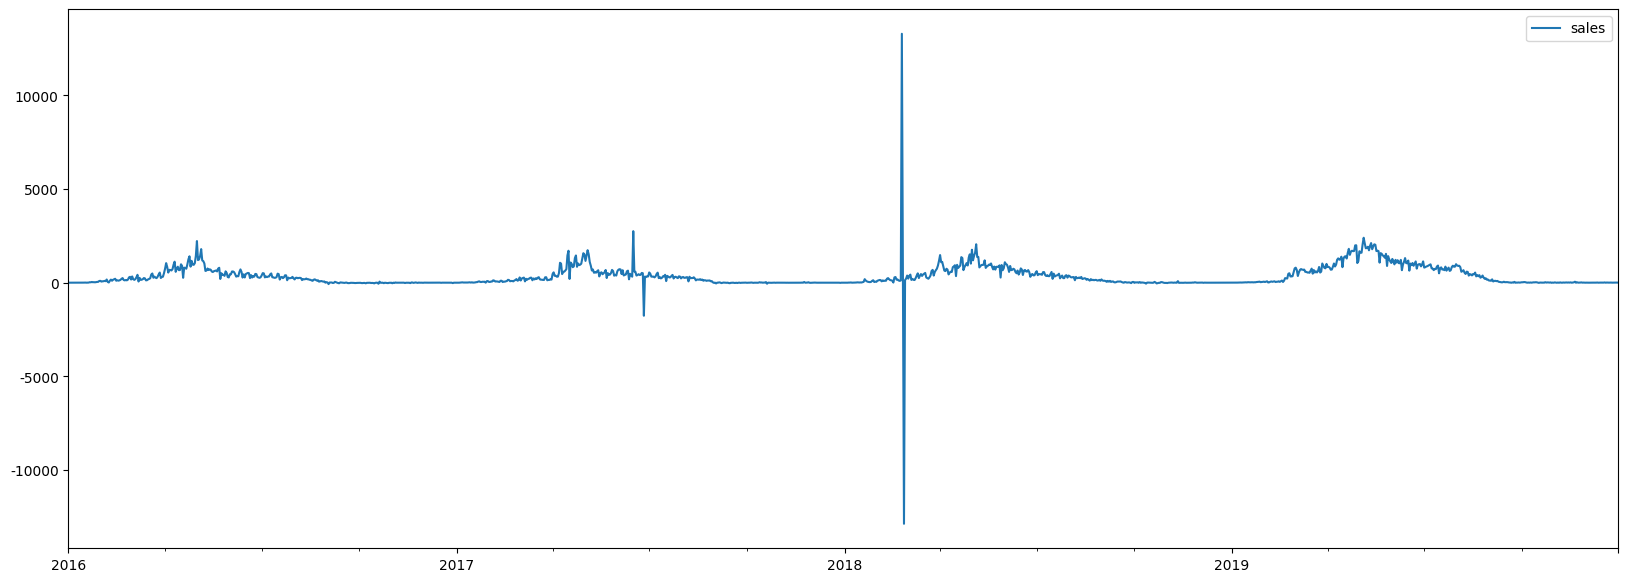

In [31]:
df.plot(figsize=(20,7))

In [32]:
#이상치 삭제 위해 값 변환
df[(df['sales']<-1000)|(df['sales']>2500)]=0

<Axes: >

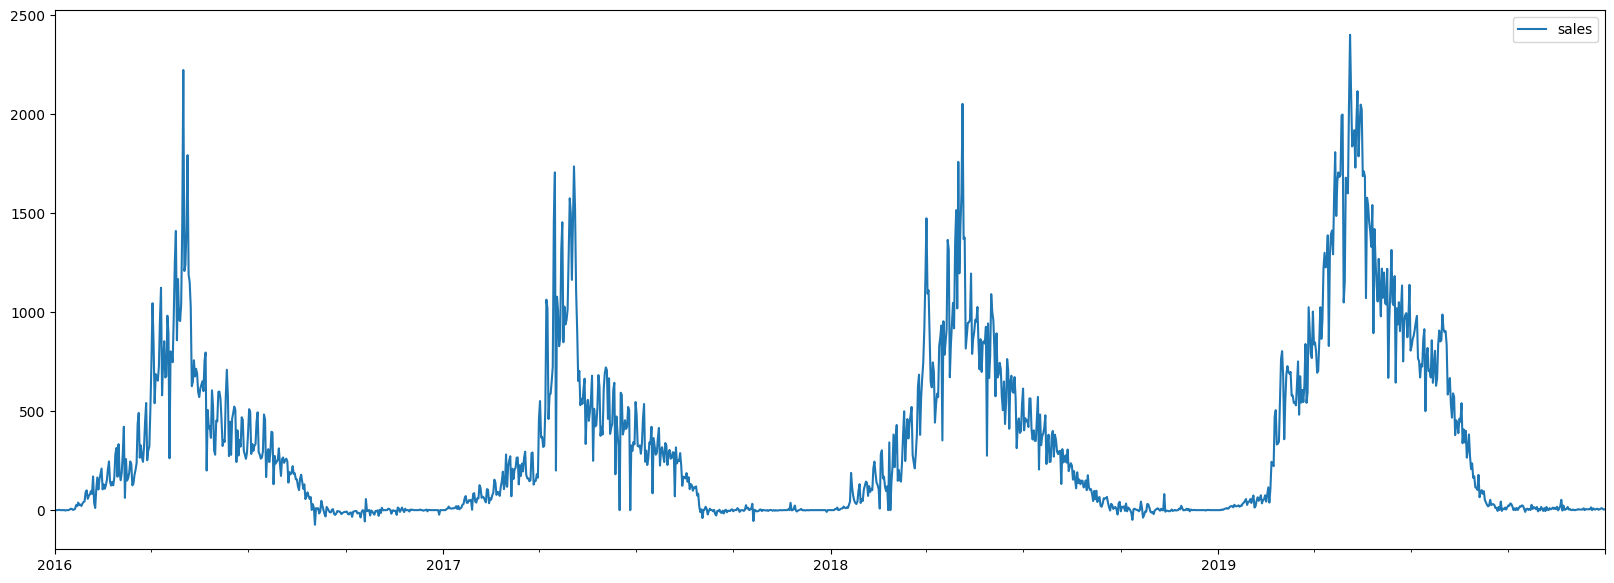

In [33]:
df.plot(figsize=(20,7))

In [34]:
#학습 데이터: 2019년 여름 시즌까지의 데이터
#테스트 데이터는 2019년 여름 시즌 부터 겨울까지 100일 예측

train_df=df[:-200]
test_df=df[-200:-100]

<Axes: >

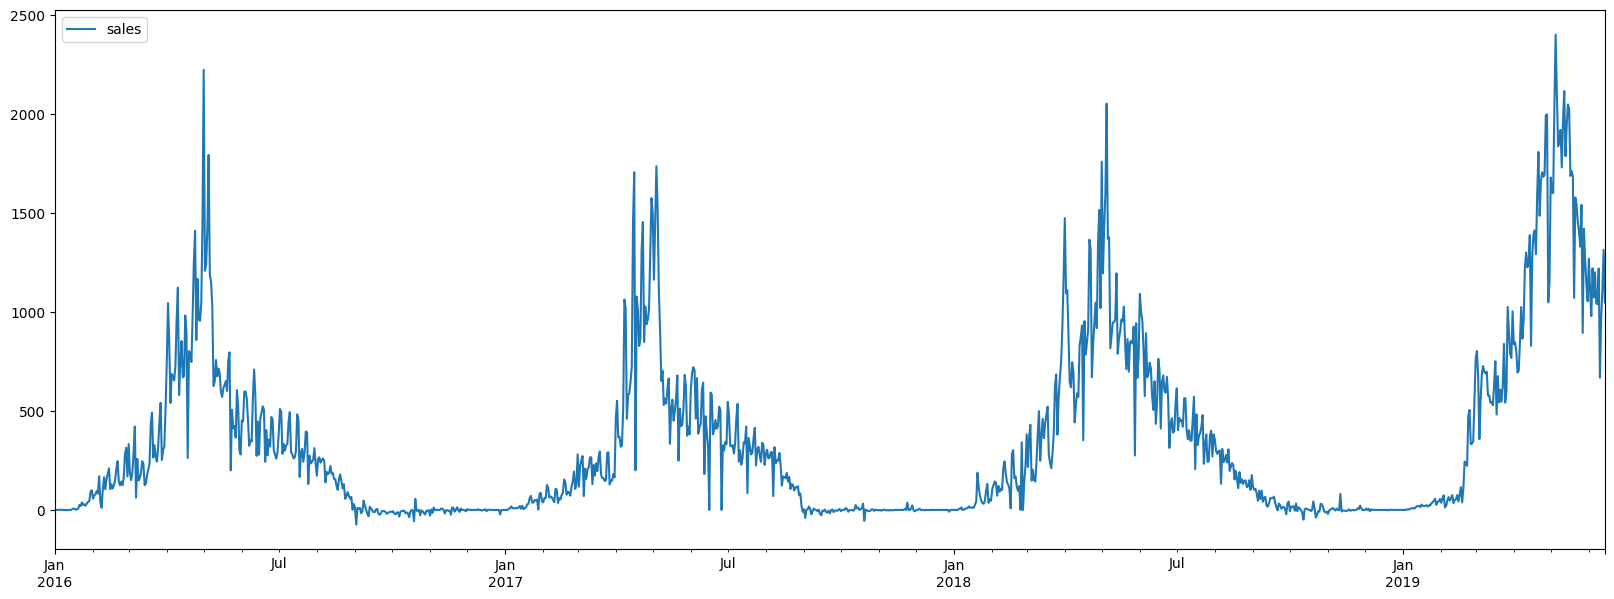

In [35]:
train_df.plot(figsize=(20,7))

<Axes: >

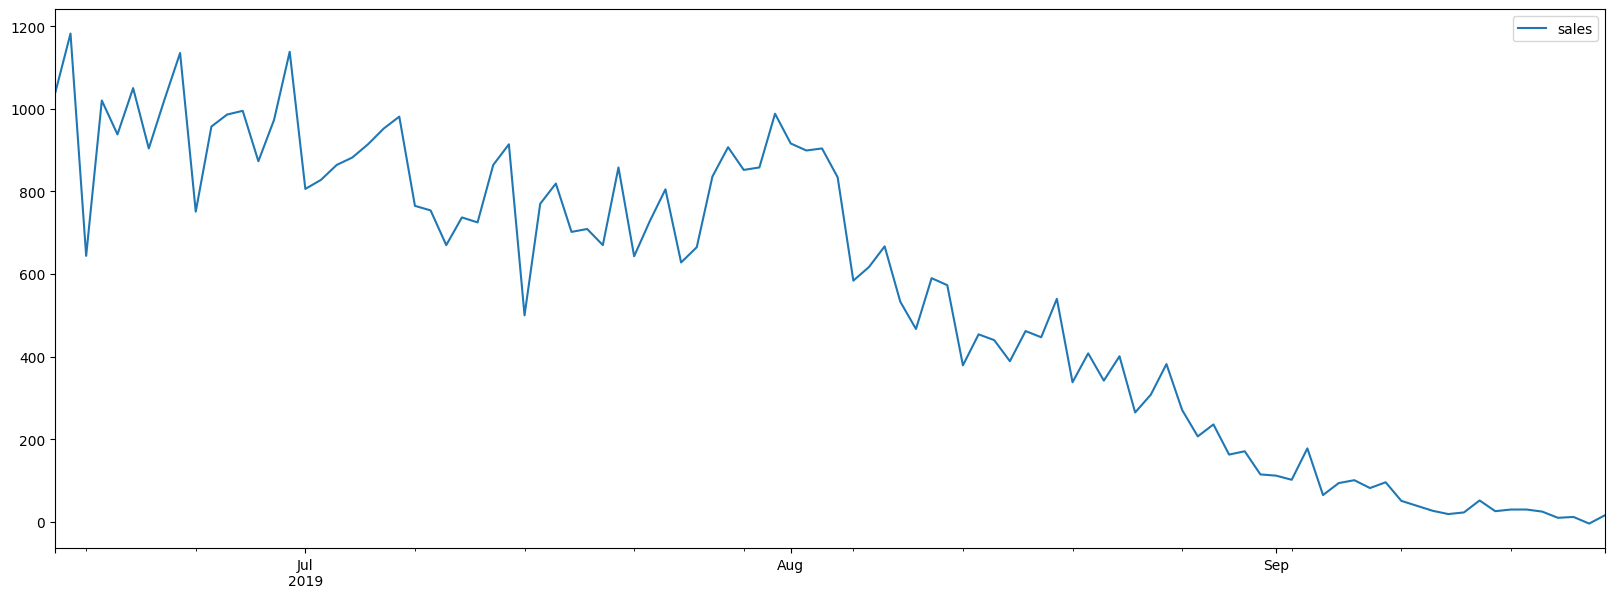

In [36]:
test_df.plot(figsize=(20,7))

# 시계열 예측

In [37]:
%pip install --upgrage gluonts=0.12.3 mxnet-mkl--1.6.0 numpy==1.23.1


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgrage


In [38]:
%pip install --upgrade gluonts==0.12.3 mxnet-mkl==1.6.0 numpy==1.23.1

In [39]:
from gluonts.dataset.common import ListDataset #데이터셋을 만들기 위해
from gluonts.dataset.field_names import FieldName
from gluonts.mx.model.deepar import DeepAREstimator #deepar이라는 패키지 사용할 것
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions #예측값을 평가하기 위해서
from pathlib import Path

In [58]:
def plot_prob_forecasts(ts_entry,forecast_entry):
  prediction_intervals=(90.0,50.0)
  legend = ["Sales","observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

  fig, ax =plt.subplots(1,1,sharex=True, sharey=False,figsize=(20,7))
  #차트가 여러개면, sharex,sharey를 통해 x축 실행, y축 실행 선택 정해야함.

  ts_entry.plot(ax=ax)

  forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
  plt.grid(which="both")
  plt.legend(legend, loc="upper left")
  plt.show()

In [41]:
train_df.head(1)

,sales
2016-01-01,0.0


In [42]:
test_df.head(1)

,sales
2019-06-15,1035.0


In [43]:
train_df.values.flatten()

array([   0.,    0.,    0., ..., 1116., 1314., 1049.])

In [44]:
# DeepAR 알고리즘을 사용하기 위해 미리 만들어둔 DataFrame을 ListDataset으로 다시 생성
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
import pandas as pd

# Train 데이터셋 생성
train_ds = ListDataset([
    {
        FieldName.TARGET: train_df.values.flatten(),
        FieldName.START: pd.Timestamp("2016-01-01 00:00:00")
    }
], freq="D")

# Test 데이터셋 생성
test_ds = ListDataset([
    {
        FieldName.TARGET: test_df.values.flatten(),
        FieldName.START: pd.Timestamp("2019-06-15 00:00:00")
    }
], freq="D")


In [45]:
test_ds

[{'target': array([1035., 1182.,  644., 1020.,  938., 1050.,  904., 1022., 1135.,
          751.,  957.,  986.,  995.,  873.,  973., 1138.,  806.,  828.,
          864.,  882.,  914.,  952.,  981.,  765.,  754.,  670.,  737.,
          725.,  864.,  914.,  500.,  770.,  819.,  702.,  709.,  670.,
          858.,  643.,  728.,  805.,  628.,  665.,  836.,  907.,  852.,
          858.,  988.,  916.,  899.,  904.,  834.,  584.,  617.,  667.,
          533.,  467.,  590.,  573.,  379.,  454.,  440.,  389.,  462.,
          447.,  540.,  338.,  408.,  342.,  401.,  265.,  308.,  382.,
          271.,  207.,  236.,  163.,  171.,  115.,  112.,  102.,  178.,
           65.,   94.,  101.,   82.,   96.,   51.,   39.,   27.,   19.,
           23.,   52.,   26.,   30.,   30.,   25.,   10.,   12.,   -4.,
           16.], dtype=float32),
  'start': Period('2019-06-15', 'D')}]

# 위에 시계열 분석하기 위해 데이터 가공, 밑에는 예측 시작

In [48]:
#시계열 예측에 가장 많이 사용하는- DeepAR
estimator=DeepAREstimator(
    freq='D',
    trainer=Trainer(ctx="cpu", epochs=30, learning_rate=1E-3, hybridize=True, num_batches_per_epoch=30,),
    num_layers=4,
    num_cells=40,
    context_length=30,
    cell_type='lstm',
    prediction_length=30 #30일에 대해 예측
)

predictor=estimator.train(train_ds)

100%|██████████| 30/30 [00:11<00:00,  2.61it/s, epoch=30/30, avg_epoch_loss=4.33]


In [49]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,
    predictor=predictor,
    num_samples=10,
)

forecasts = list(forecast_it)
tss = list(ts_it)

In [50]:
forecasts[0]

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[493.89777 , 506.20712 , 296.4572  , 287.56284 , 252.00288 ,
        273.86462 , 290.27985 , 330.72504 , 404.94418 , 416.43503 ,
        329.31558 , 359.4687  , 397.1723  , 388.06503 , 443.6761  ,
        393.66733 , 385.27692 , 347.9107  , 303.75455 , 387.58386 ,
        429.2805  , 368.13663 , 376.20886 , 283.85275 , 276.5219  ,
        269.01633 , 213.72874 , 334.91882 , 325.16837 , 425.07425 ],
       [457.12103 , 507.22067 , 301.85205 , 210.184   , 280.28622 ,
        248.49171 , 214.6843  , 475.04807 , 469.48148 , 295.26404 ,
        342.01025 , 247.05426 , 298.14767 , 473.45377 , 488.86057 ,
        466.69864 , 458.6395  , 311.99988 , 329.67438 , 356.89047 ,
        342.40747 , 324.00235 , 489.6151  , 340.70245 , 242.63995 ,
        303.07797 , 285.35962 , 286.3071  , 373.30997 , 410.13956 ],
       [479.1726  , 498.69247 , 322.12033 , 295.63995 , 410.63962 ,
        278.6386  , 362.1242  , 360.24368 ,

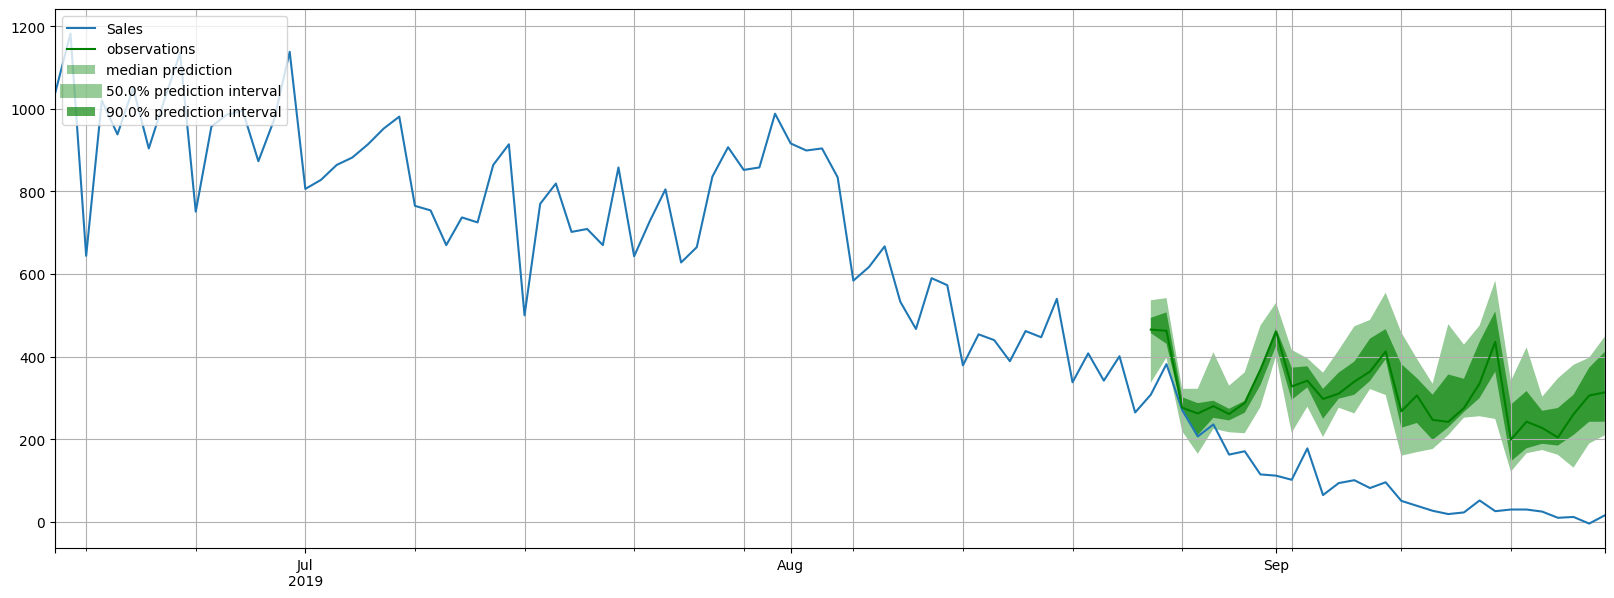

In [59]:
ts_entry = tss[0]
test_ds_entry = next(iter(test_ds))
forecast_entry = forecasts[0]

plot_prob_forecasts(ts_entry, forecast_entry)

# RandomForest 활용 모델링

In [61]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope #기울기 가져오는 함수

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels) #예측된 값과 정답을 구해서 얼마나 틀렸는지 확인
    mape = 100 * np.mean(errors / test_labels)
    return mape

In [62]:
rdf=df

In [63]:
rdf

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0
...,...
2019-12-27,7.0
2019-12-28,10.0
2019-12-29,6.0
2019-12-30,3.0


**단변량 데이터를 다변량 데이터로 변환**

In [64]:
rdf['slope7'] = rdf['sales'].rolling(7).apply(get_slope, raw=True) #7일동안 얼마나 올라가고 있지? 이런 느
rdf['slope21'] = rdf['sales'].rolling(21).apply(get_slope, raw=True)

rdf['std7'] = rdf['sales'].rolling(7).std(raw=True) #7일동안의 표준편차
rdf['std21'] = rdf['sales'].rolling(21).std(raw=True) #21일동안의 표준편차

rdf['mean7'] = rdf['sales'].rolling(7).mean(raw=True)
rdf['mean21'] = rdf['sales'].rolling(21).mean(raw=True)

rdf['skew7'] = rdf['sales'].rolling(7).skew()#왜도
rdf['skew21'] = rdf['sales'].rolling(21).skew()

rdf['kurt7'] = rdf['sales'].rolling(7).kurt() #첨도
rdf['kurt21'] = rdf['sales'].rolling(21).kurt()

rdf['min7'] = rdf['sales'].rolling(7).min() #적게 팔린날
rdf['min21'] = rdf['sales'].rolling(21).min()

rdf['max7'] = rdf['sales'].rolling(7).max()#많이 팔린날
rdf['max21'] = rdf['sales'].rolling(21).max()

rdf #컬럼이 15개로 늘어났다. 공선성이 생길 순 있지만 흐름을 반영한 feature들 추출

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,7.0,0.250000,0.097403,1.976047,3.192253,4.714286,4.761905,0.007406,1.187231,-1.703987,2.421273,2.0,0.0,7.0,14.0
2019-12-28,10.0,0.714286,0.140260,2.760262,3.360130,5.571429,5.095238,0.292092,0.905282,-0.532219,1.196896,2.0,0.0,10.0,14.0
2019-12-29,6.0,0.392857,0.122078,2.516611,3.330237,6.000000,5.238095,-0.087837,0.802422,0.766205,1.174728,2.0,0.0,10.0,14.0
2019-12-30,3.0,0.071429,0.061039,2.760262,3.330237,5.571429,5.238095,0.292092,0.802422,-0.532219,1.174728,2.0,0.0,10.0,14.0


In [65]:
rdf = rdf[31:-122] #1월부터는 날렸다.
rdf

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-02-01,57.0,10.428571,3.935065,29.668807,28.585461,55.285714,26.142857,0.707934,1.414898,-0.996791,1.687694,21.0,0.0,100.0,100.0
2016-02-02,73.0,7.428571,4.170130,25.927555,29.665597,62.714286,29.619048,0.432936,1.131092,-1.569140,0.591354,33.0,0.0,100.0,100.0
2016-02-03,79.0,4.928571,4.388312,22.779481,30.712337,69.285714,33.380952,-0.009294,0.890337,-1.599134,-0.201782,41.0,0.0,100.0,100.0
2016-02-04,96.0,3.750000,4.724675,20.796062,32.582934,77.142857,37.952381,-0.605401,0.728907,-0.889447,-0.711343,44.0,1.0,100.0,100.0
2016-02-05,82.0,-0.464286,4.797403,14.797040,32.904624,82.571429,41.714286,-0.671901,0.525719,0.109354,-1.088270,57.0,1.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,207.0,-19.571429,-15.477922,69.092760,115.800465,310.857143,422.047619,-0.111242,0.215076,-0.979418,-0.202045,207.0,207.0,401.0,667.0
2019-08-28,236.0,-23.142857,-14.394805,72.653778,108.157579,295.714286,401.523810,0.520910,-0.022144,-1.141687,-0.663417,207.0,207.0,401.0,590.0
2019-08-29,163.0,-22.321429,-15.614286,70.837171,115.552977,261.714286,383.904762,0.457962,-0.075926,0.499161,-0.457565,163.0,163.0,382.0,590.0
2019-08-30,171.0,-31.571429,-17.192208,78.595408,122.739814,248.285714,369.809524,0.702253,0.013609,-0.212503,-0.614049,163.0,163.0,382.0,590.0


**train test 분할**

In [66]:
y = rdf['sales']
X = rdf.drop('sales', axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle=False)

MAPE: 159.79519144734408


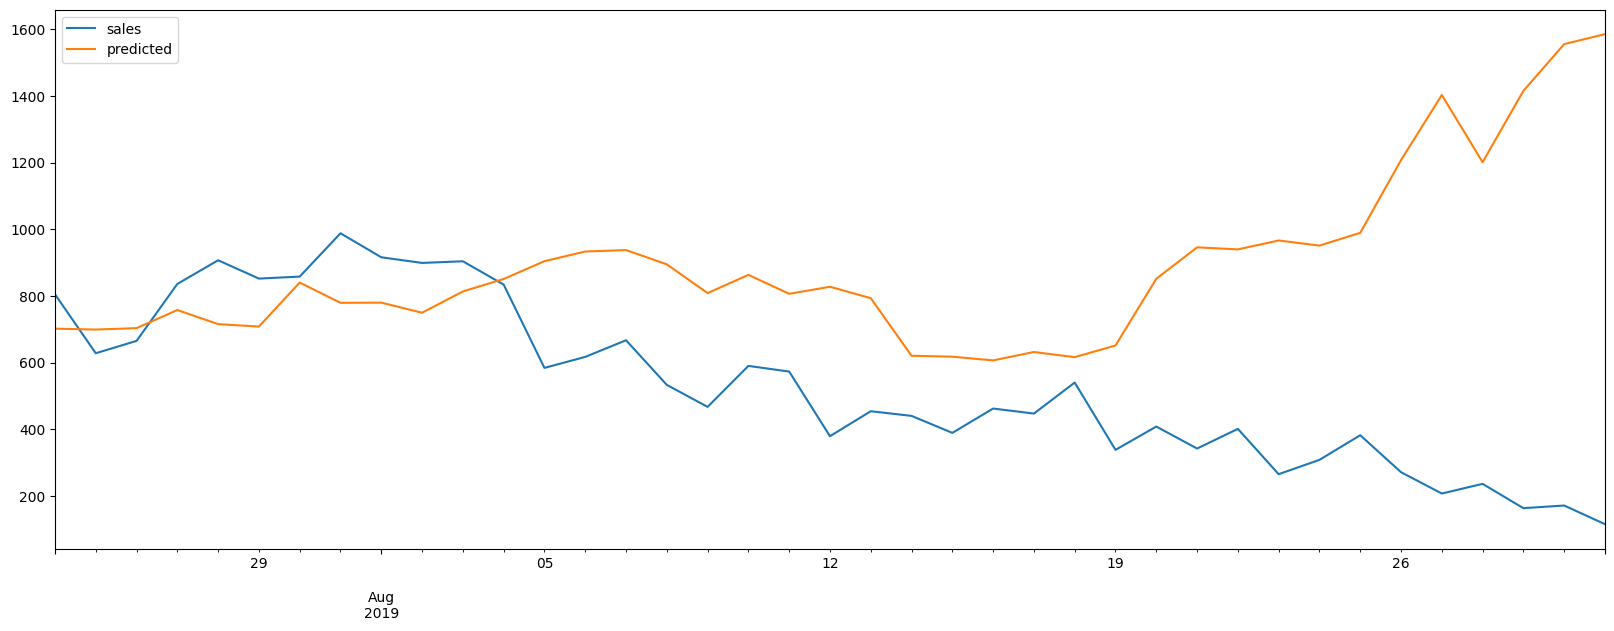

In [67]:
# Default 세팅으로 RandomForest 학습
rf = RandomForestRegressor(random_state = 0)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")
#파란색이 실제 판매량 주황색이 예측한 것, 언더피팅 된 부분도 보인다 (주황색이 튀어오른)

MAPE: 177.8002335412648


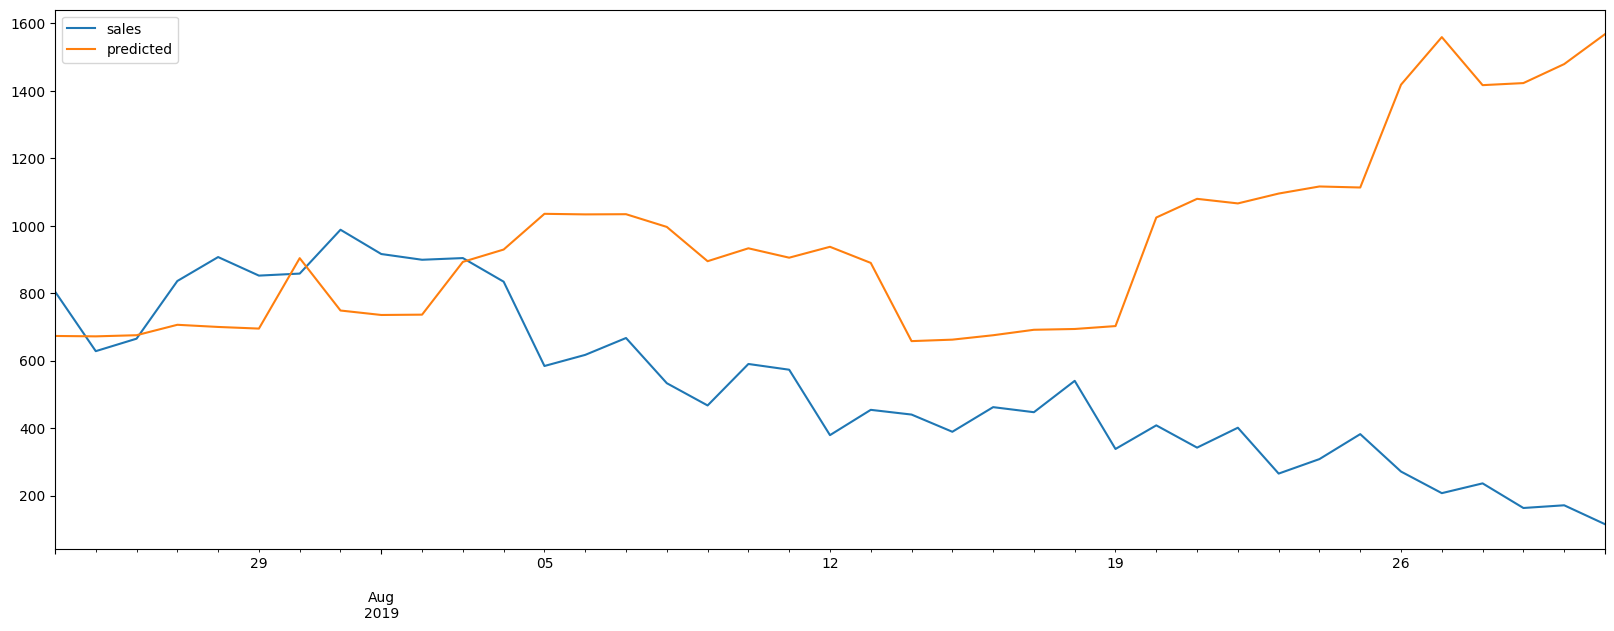

In [68]:
# Under fitting을 조정하기 위한 n_estimator와 max_features만 조정
rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")
#축의 차이를 보면 엄청나게 줄어든 것을 볼 수 있다. 이런저런 시도를 해봐라

In [69]:
#해마다 늘어나는 판매량 반영
rdf['year'] = rdf.index.year
#월마다 바뀌는 판매량 반영
rdf['month'] = rdf.index.month
#요일별 판매량 반영
rdf['weekofday'] = rdf.index.dayofweek #평일, 주말, 월욜,화욜~ 머 이런식으로

y = rdf['sales']
X = rdf.drop('sales', axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle=False)
#년,월,일에 따른 판매량 반영한거를 보기!

MAPE: 113.36230041943718


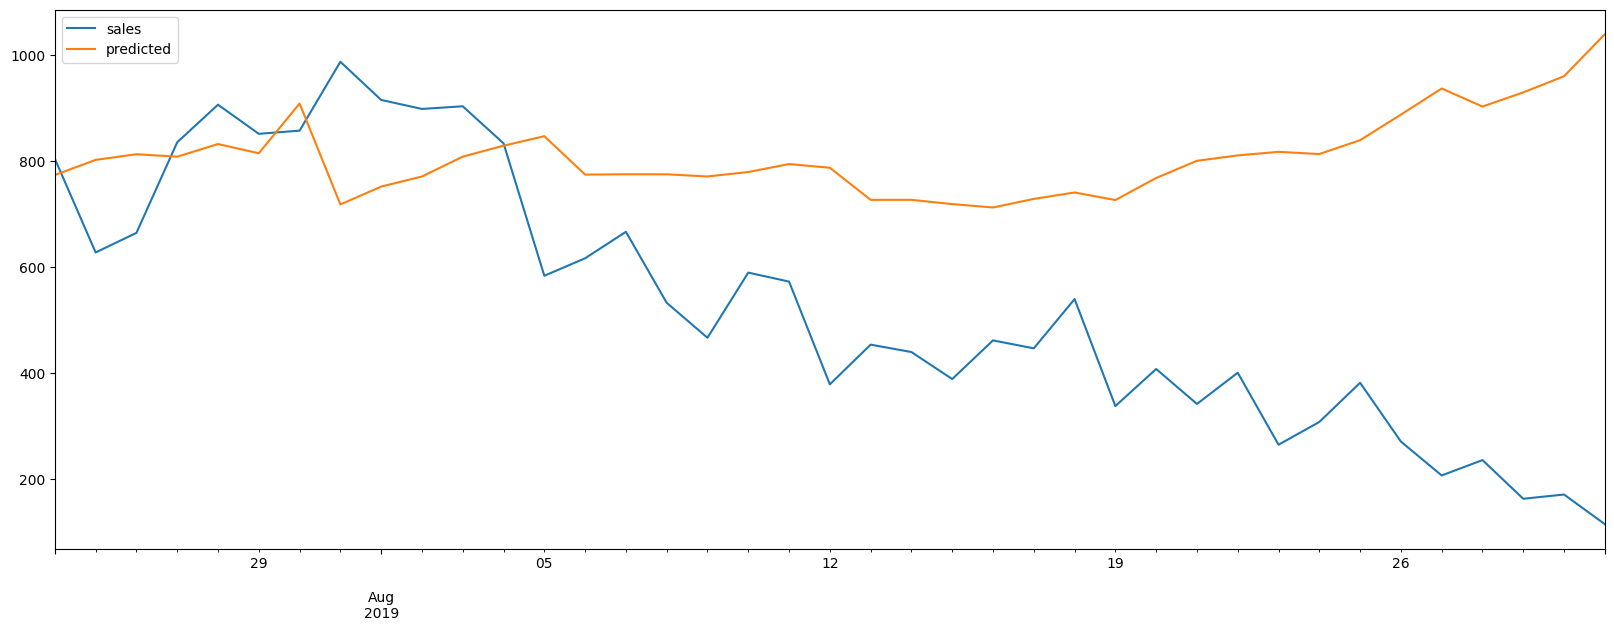

In [70]:
rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")